In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bartek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
train_df['author'].fillna('Anonymous', inplace=True)

In [4]:
train_df[train_df.isnull().any(axis=1)]

,id,title,author,text,label
53,53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1
120,120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
124,124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1
140,140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
142,142,Gorafi Magazine : Entretien exclusif avec Bara...,Anonymous,NaN,1
...,...,...,...,...,...
20568,20568,NaN,Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1
20627,20627,NaN,Ramona,"No she doesn’t have more money than God, every...",1
20636,20636,NaN,Dave Lowery,Trump all the way!,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1


In [5]:
train_df = train_df.dropna().reset_index()

In [6]:
train_df = train_df.drop('id', axis = 1)
test_df = test_df.drop('id', axis = 1)

In [7]:
x = train_df.drop('label', axis = 1)
y = train_df['label']

In [8]:
stemmer = PorterStemmer()

In [9]:
stopwords_eng = set(stopwords.words('english'))
text_no_stopwords = []
for i in range(len(x)):
    text = re.sub('[^a-zA-z]', ' ', x['title'][i])
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if not word in stopwords_eng]
    text = ' '.join(text)
    text_no_stopwords.append(text)

In [59]:
text_onehot = [one_hot(text, 10000) for text in text_no_stopwords]
max_sentence_len = 30
text_onehot_embedding = pad_sequences(text_onehot, maxlen = max_sentence_len)

In [60]:
model = Sequential()
model.add(Embedding(10000, 40,  input_length = max_sentence_len))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [61]:
x = np.array(text_onehot_embedding)
y = np.array(y)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [63]:
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10, batch_size = 32)

Epoch 1/10
506/506 [==============================] - 11s 18ms/step - loss: 0.3765 - accuracy: 0.8194 - val_loss: 0.1780 - val_accuracy: 0.9285
Epoch 2/10
506/506 [==============================] - 9s 18ms/step - loss: 0.1116 - accuracy: 0.9575 - val_loss: 0.1682 - val_accuracy: 0.9342
Epoch 3/10
506/506 [==============================] - 9s 17ms/step - loss: 0.0629 - accuracy: 0.9775 - val_loss: 0.2029 - val_accuracy: 0.9310
Epoch 4/10
506/506 [==============================] - 9s 17ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.2409 - val_accuracy: 0.9290
Epoch 5/10
506/506 [==============================] - 10s 19ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.3029 - val_accuracy: 0.9230
Epoch 6/10
506/506 [==============================] - 8s 17ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.3733 - val_accuracy: 0.9233
Epoch 7/10
506/506 [==============================] - 9s 17ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.3879 - val_accuracy: 0.91

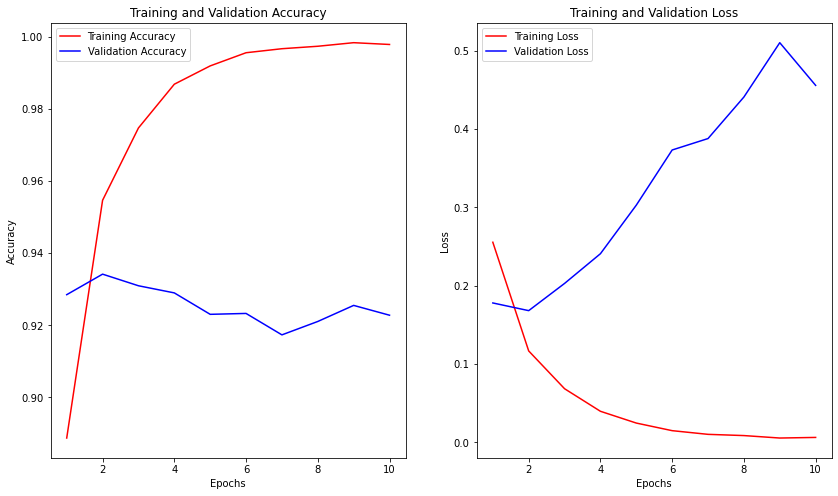

In [64]:

acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,11)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.plot(epochs,acc_train,'r',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs,loss_train,'r',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [65]:
predictions = model.predict_classes(x_test)

C:\Users\Bartek\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [66]:
print('\nConf. Matrix:')
print(metrics.confusion_matrix(y_test, predictions))
print('\nAcc. Score')
print(metrics.accuracy_score(y_test, predictions))
print('\nClassification Report:')
print(metrics.classification_report(y_test, predictions))


Conf. Matrix:
[[1851  206]
 [ 106 1878]]

Acc. Score
0.9227913882702301

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2057
           1       0.90      0.95      0.92      1984

    accuracy                           0.92      4041
   macro avg       0.92      0.92      0.92      4041
weighted avg       0.92      0.92      0.92      4041

